---

# Introduction

In this homework you will:

* Recall your skills of data analysis and preprocessing.
* Explore the behaviour of different machine learning models.
* Try to solve a regression type problem and interpret the results.

But first of all, a few notes:

* Check the first homework for a quick reminder on general rules.
* We do not expect you to make a model that makes necessarly good predictions, rather than explain why do you get the results which you get.
* We reserve the right to lower the grade for messy code, so keep it clean and make comments about what you do!
* Remember to submit the feedback! Especially if the homework was too difficult or easy for you.

This time, you will do the coding part yourself. That means, you take decisions about EDA, data cleaning, hyperparameters choice, etc. on your own (for the most part, at least).

Enjoy it while I rest!  \ (•◡•) /

Another important mention: your work must be reproducible.
It means that it would be possible to run your code and obtain the same results by pressing "Run All" button in settings of this notebook. To do so, don't forget to fix the random seed number where possible!

# Dataset

Today your task will be to understand the relationship between the cholesterol level and its associated factors, such as gender, age, BMI, medical condition and some genomic features. This can be explored by a regression analysis using machine learning methods that we learned in the class.

Description of the variables:

* DM: diabetes mellitus: 0 = no diabetes, 1 = diabetes
* age: Age in years
* chol: Serum total cholesterol, mg/dl
* BMI: Body-mass index, kg/m2
* TG: Serum triglycerides, mg/dl
* APOE: Apolipoprotein E genotype, with six genotypes coded 1-6: 1 = e2/e2, 2 = e2/e3, 3 = e2/e4, 4 = e3/e3, 5 = e3/e4, 6 = e4/e4
* rs174548: Candidate SNP 1 genotype, chromosome 11, physical position 61,803,876
. Coded as the number of minor alleles: 0 = C/C, 1 = C/G, 2 = G/G.
* rs4775041: Candidate SNP 2 genotype, chromosome 15, physical position 58,382,496. Coded as the number of minor alleles: 0 = C/C, 1 = C/G, 2 = G/G.
* HTN: diagnosed hypertension: 0 = no, 1 = yes
* chd: diagnosis of coronary heart disease: 0 = no, 1 = yes

Target variable: Serum total cholesterol

# Tasks [8.0]

### Exploratory Data Analysis [2.5]

[0.1] Before the analysis itself, don't forget to check the features you are working with. Some of them are not very obvious. Google some information on what those features represent, and write it down here:

* TG - Normal	<200, Borderline	200 to 400, High	400 to 1000, Very high	>1000. High triglyceride levels can lead to serious health conditions such as heart failure, stroke, and heart attack
* APOE - Apo-E belongs to a family of fat-binding proteins called apolipoproteins. Involved in cholesterol transportation. Each of variations in the hometask have been associated with different levels of cholesterol and different health risks, especially [APOE 4](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2600507/)
* rs174548 - FADS1 codes for an enzyme involved in fatty acid unsaturation and the FADS1 gene SNP rs174548 seems to explain as much as ten percent of the variance in the metabolism of some glycerophospholipids. [SNPedia](https://www.snpedia.com/index.php/Rs174548)
* rs4775041 -A study of metabolite concentrations in the blood of 284 adult males from Southern Germany determined that several SNPs were associated either directly with a metabolite range or with a ratio of metabolites. The rarer rs4775041(G) allele was associated with increased phosphatidylethanolamine values. [SNPedia](https://www.snpedia.com/index.php/Rs4775041)

You can (and should!) use this information when interpreting results.

Download the data:

In [ ]:
!gdown 1PrtyKo4e_q7jm7lR27CL7VbWVC8vZoWP

Downloading...
From: https://drive.google.com/uc?id=1PrtyKo4e_q7jm7lR27CL7VbWVC8vZoWP
To: /content/Data-Cholesterol-V2.csv
100% 11.4k/11.4k [00:00<00:00, 28.2MB/s]


In [ ]:
import scipy
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

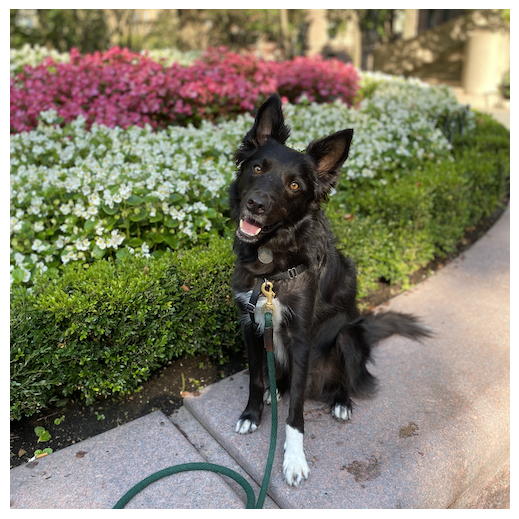

In [ ]:
sns.dogplot() # Кирилл, держи пёсика

In [ ]:
data = pd.read_csv("/content/Data-Cholesterol-V2.csv")
data

,DM,age,chol,BMI,TG,APOE,rs174548,rs4775041,HTN,chd
0,1,74,215,26.2,367,4,1,2,1,1
1,1,51,204,24.7,150,4,2,1,1,1
2,0,64,205,24.2,213,4,0,1,1,0
3,0,34,182,23.8,111,2,1,1,1,0
4,1,52,175,34.1,328,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
395,0,71,169,25.8,322,4,0,0,1,0
396,0,57,173,NaN,205,4,0,0,0,0
397,1,33,180,20.6,56,4,0,1,1,0
398,1,78,212,24.0,273,4,1,0,1,0


In [ ]:
data.describe()

,DM,age,chol,BMI,TG,APOE,rs174548,rs4775041,HTN,chd
count,400.00000,400.000000,400.00000,363.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.50250,54.822500,183.91500,24.954821,178.687500,3.930000,0.497500,0.565000,0.787500,0.317500
std,0.50062,14.430231,22.11777,3.120144,86.574319,0.909488,0.617208,0.621886,0.409589,0.466087
min,0.00000,30.000000,117.00000,19.400000,47.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,43.000000,168.00000,22.650000,114.750000,4.000000,0.000000,0.000000,1.000000,0.000000
50%,1.00000,55.000000,184.00000,24.500000,156.500000,4.000000,0.000000,0.000000,1.000000,0.000000
75%,1.00000,67.000000,199.25000,26.750000,234.500000,4.000000,1.000000,1.000000,1.000000,1.000000
max,1.00000,80.000000,247.00000,38.800000,671.000000,6.000000,2.000000,2.000000,1.000000,1.000000


[0.5] Know your data, make relevant data analysis and explain:
 * What types of variables there are

 Numerical: `BMI`, `chol`, `age`, `TG` and categorical: `DM`, `APOE`, `rs*`, `HTN` and `chd`
 * Your strategy about NaN values, if any present

Will tell u later after looking at data at first))

 * Your strategy about categorical columns, if any present

 One-hot encoding

In [ ]:
data.dtypes

DM             int64
age            int64
chol           int64
BMI          float64
TG             int64
APOE           int64
rs174548       int64
rs4775041      int64
HTN            int64
chd            int64
dtype: object

In [ ]:
data.isna().sum()

DM            0
age           0
chol          0
BMI          37
TG            0
APOE          0
rs174548      0
rs4775041     0
HTN           0
chd           0
dtype: int64

Assuming your data is now certainly clean, you can start looking at the features.

[0.5] Make relevant visualization of features(histograms, boxplots, etc.) and analyze it.

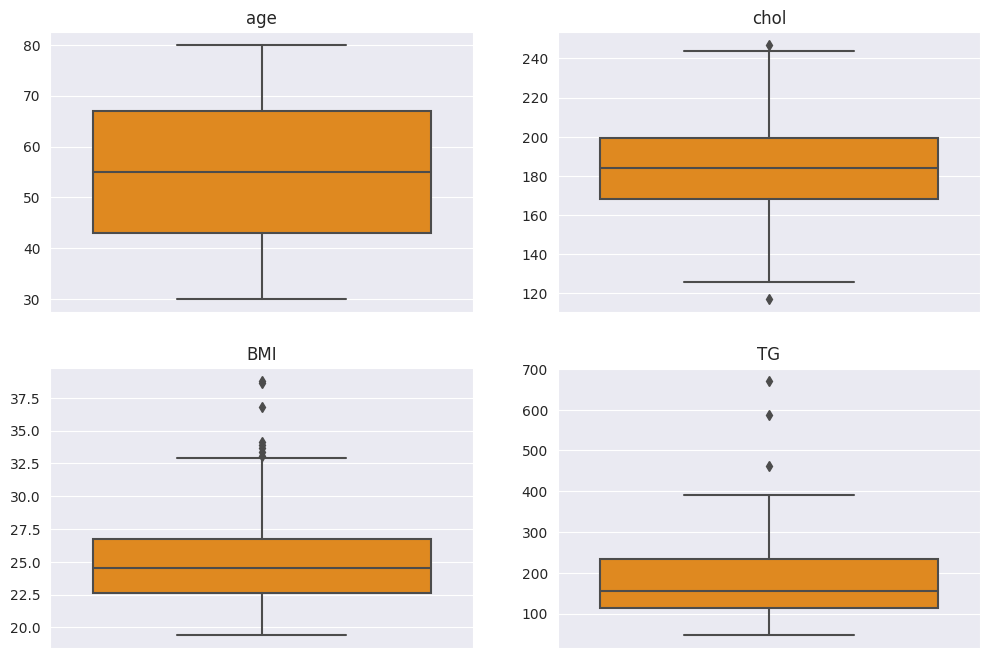

In [ ]:
# Create figure with 20 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
# By default, axes is a 4x5 matrix, ravel it to a flat array with 20 elements
axes = axes.ravel()

# Plot boxplot for each numeric column
for col, ax in zip(["age", "chol", "BMI", "TG"], axes):
  sns.boxplot(y = data[col], ax=ax, color='darkorange')
  #sns.violinplot(y = df[col], ax=ax)
  ax.set_title(col)
  ax.set(xlabel='', ylabel='')

Seems there are some outliers. Not that many, I hope, because dataset is quite small and I don't want to cut it in twice

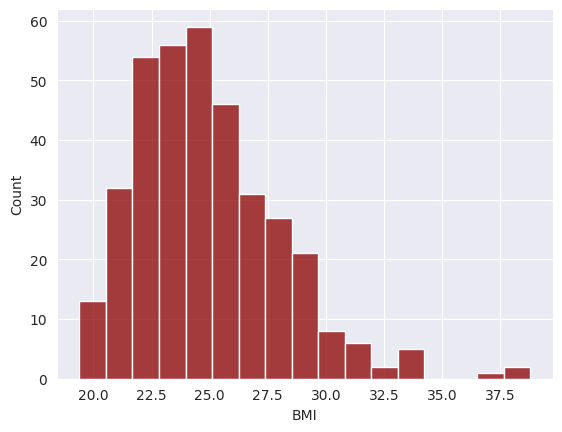

In [ ]:
sns.histplot(data.BMI, color='darkred') ## Hmm, outliers...
None

In [ ]:
data[data.BMI >= 32.5]

,DM,age,chol,BMI,TG,APOE,rs174548,rs4775041,HTN,chd
4,1,52,175,34.1,328,2,0,0,1,0
60,1,44,225,33.4,356,5,0,0,0,0
118,1,64,208,36.8,335,4,0,0,0,0
151,1,60,196,38.8,250,4,1,2,0,0
181,0,58,195,32.9,388,4,0,1,1,0
265,0,73,222,38.6,586,4,1,0,1,0
303,1,77,191,33.1,323,2,0,0,1,0
315,1,78,163,33.7,360,2,0,1,1,0
377,0,72,186,33.9,348,5,1,0,1,0


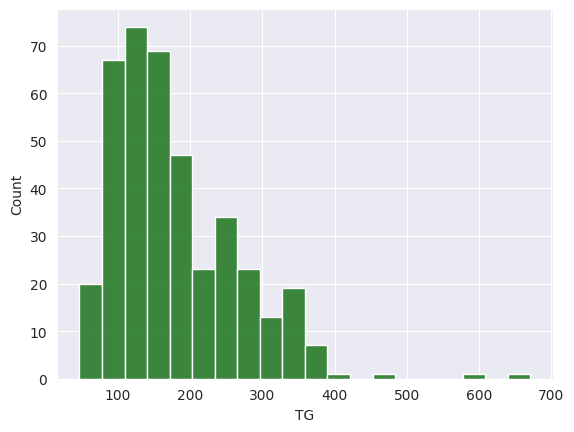

In [ ]:
sns.histplot(data.TG, color='darkgreen')
None

In [ ]:
data[data.TG >= 400] ## Just 3 people, surely I remove'em

,DM,age,chol,BMI,TG,APOE,rs174548,rs4775041,HTN,chd
104,0,69,209,28.4,461,4,0,0,1,0
265,0,73,222,38.6,586,4,1,0,1,0
277,1,46,221,30.8,671,4,1,1,1,1


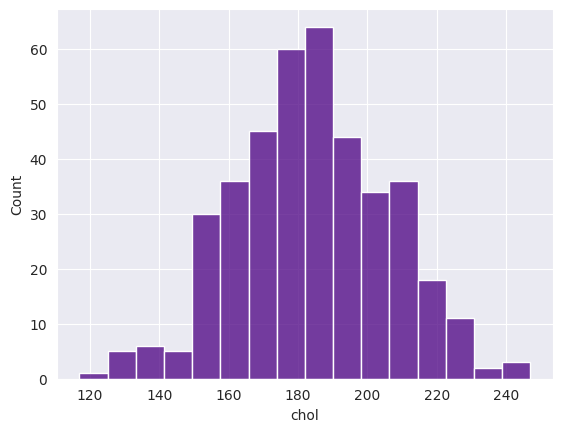

In [ ]:
sns.histplot(data.chol, color='indigo') ## Looks ok, although I can throw away chol <= 120 and chol >= 230
None

[0.75] Explore the relationship of features and interpret it if possible.

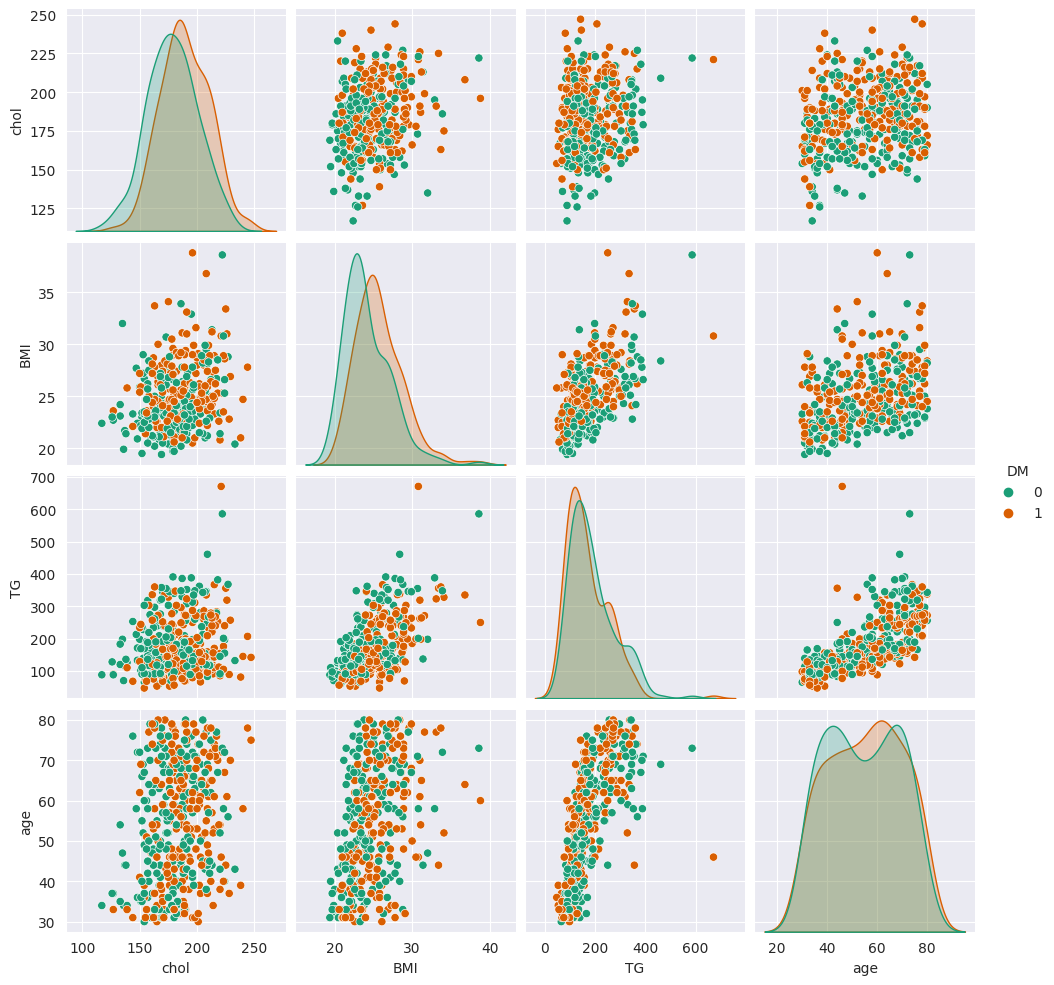

In [ ]:
sns.pairplot(data, vars=["chol", "BMI", "TG", "age"], hue="DM", palette='Dark2') # Check everything that can be distributed
None

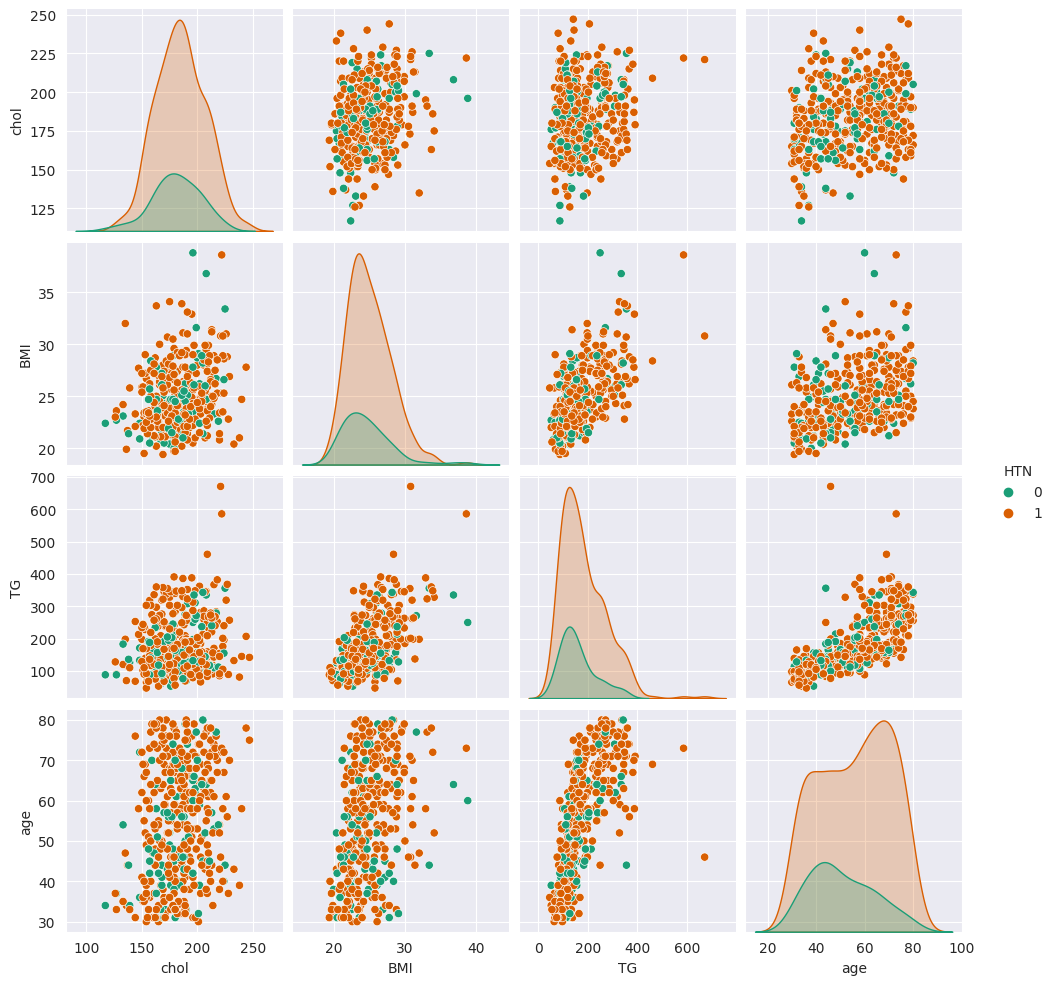

In [ ]:
sns.pairplot(data, vars=["chol", "BMI", "TG", "age"], hue="HTN", palette='Dark2')
None

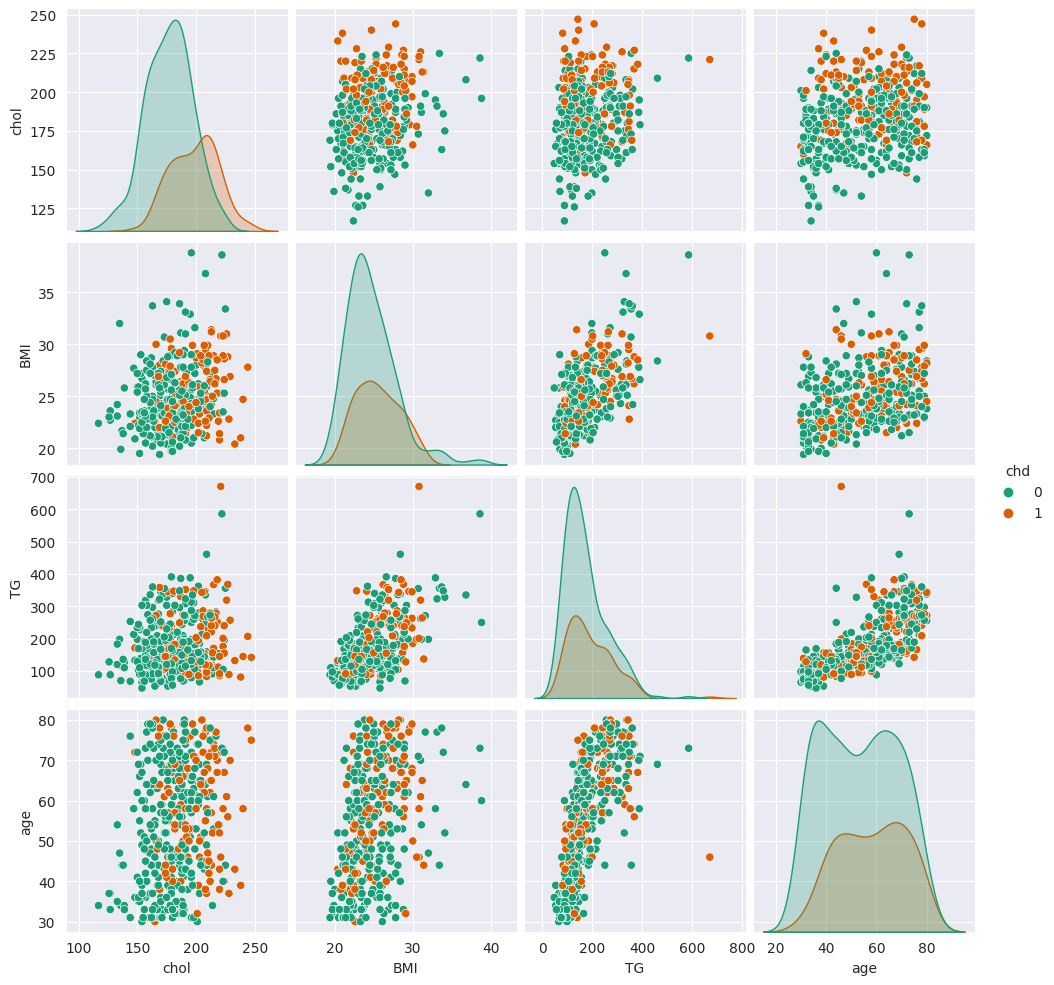

In [ ]:
sns.pairplot(data, vars=["chol", "BMI", "TG", "age"], hue="chd", palette='Dark2')
None

The separated by `chd` and `HTN` distributions show significant difference. It cannot be said that scatterplots show the same, but I wanna have a guess that these features might be informative for the model (especially `chd`)

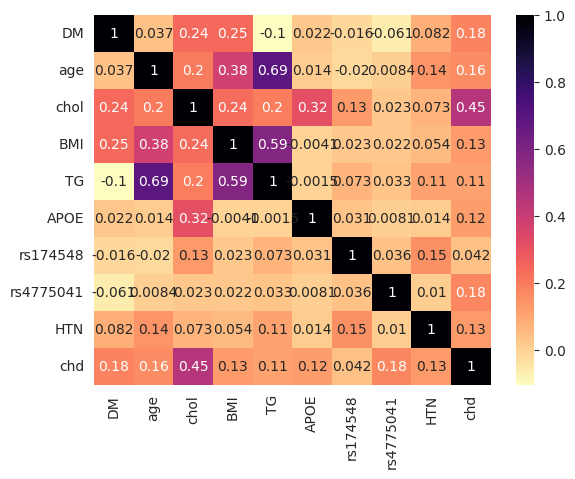

In [ ]:
sns.heatmap(data.corr(method="pearson"), cmap='magma_r', annot=True)
None

I don't like the correlation between `age` and `TG` level. It could be seen earlier at the pairplots, but it's much more obvious here. Our target `chol` seems to be OK as .45 is not that high correlation value

In [ ]:
### ALARM THAT REMOVES ALL NANs


# quantiles = data[["TG", "BMI", "chol"]].quantile([0.01, 0.99]) # Take quantiles

# for column in quantiles.columns:
#   low, high = quantiles[column].tolist()
#   mask = (data[column] >= low) & (data[column] <= high)
#   data = data[mask]

# data.shape

In [ ]:
nans_loc = data.loc[np.where(data.BMI.isna())]
nans_loc.head(5)

,DM,age,chol,BMI,TG,APOE,rs174548,rs4775041,HTN,chd
16,0,71,199,NaN,193,4,0,1,1,1
19,0,69,170,NaN,345,4,1,1,1,0
27,1,35,188,NaN,95,4,1,0,1,0
29,1,67,179,NaN,242,4,0,1,1,1
35,0,65,200,NaN,266,4,0,1,0,0


In [ ]:
nans_loc = nans_loc.loc[(nans_loc.TG < 400) & (nans_loc.chol > 120) & (nans_loc.chol < 240)] # Subset but don't touch BMI to preserve NaNs
nans_loc.shape

(36, 10)

In [ ]:
data = data.loc[(data.TG < 400) & (data.BMI < 32.5) & (data.chol > 120) & (data.chol < 240)] # And this removes too btw
data.shape

(349, 10)

In [ ]:
data = data.append(nans_loc)
data.shape

<ipython-input-69-ba92226d6a4a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(nans_loc)


(385, 10)

In [ ]:
# For NaNs I use interpolation methods and just for fun I wanna use correlated data to see how it goes

u = np.random.uniform(min(data.TG), max(data.TG), len(nans_loc))
interpolation_function = scipy.interpolate.interp1d(x=data[data.BMI.isna() == False].TG, y=data[data.BMI.isna() == False].BMI)
interpolation_function(u) # Pretty good btw

array([22.64921862, 23.82867572, 23.7519352 , 25.43513091, 25.55571615,
       24.5       , 23.26690272, 30.63118814, 23.85015056, 26.36394162,
       23.35264449, 28.28131877, 23.70430147, 27.94271304, 26.12780708,
       21.55175388, 26.0535013 , 25.08545192, 27.08798332, 24.41012549,
       23.18910431, 28.78316697, 25.9147826 , 22.52202515, 25.80918842,
       28.09513688, 24.25237027, 24.46013047, 26.3433376 , 27.02788156,
       24.04926171, 26.46557362, 21.16176645, 25.73341651, 22.03835571,
       24.5033403 ])

In [ ]:
data.BMI.loc[data.BMI.isna()] = interpolation_function(u)

<ipython-input-71-db584db328b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.BMI.loc[data.BMI.isna()] = interpolation_function(u)


In [ ]:
# OHE for categorical features

categorical_cols = ["APOE", "rs174548", "rs4775041", "chd", "HTN", "DM"]
for column in categorical_cols:
  data = pd.concat([data, pd.get_dummies(data[column], prefix=f"{column}")], axis=1)
  data.drop(column, axis=1, inplace=True)
data

,age,chol,BMI,TG,APOE_1,APOE_2,APOE_3,APOE_4,APOE_5,APOE_6,...,rs174548_2,rs4775041_0,rs4775041_1,rs4775041_2,chd_0,chd_1,HTN_0,HTN_1,DM_0,DM_1
0,74,215,26.200000,367,0,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,1
1,51,204,24.700000,150,0,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,1
2,64,205,24.200000,213,0,0,0,1,0,0,...,0,0,1,0,1,0,0,1,1,0
3,34,182,23.800000,111,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
5,39,176,22.700000,53,0,0,0,1,0,0,...,0,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,76,175,26.465574,230,0,0,0,1,0,0,...,0,0,0,1,1,0,0,1,1,0
358,36,151,21.161766,169,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,1,0
370,58,194,25.733417,191,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
371,42,165,22.038356,118,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0


[0.5] Is there anything strange about any of the features? If yes, what can be done?

- There is literally no people with high cholesterine. Add some data maybe?
- Dataset is really small, I don't think I'll be able to get smth cool. Again more data is required
- But there're outliers. They are purged.
- High correlation between some features. Transformation and OHE are required.

[0.15] Answer the following questions:

* Why can't categorical attributes be encoded with natural numbers?

They might be, why not?

In this task, as they are features and not target variable, they impact the weights. Thus, let's take this feature separately. In model it is $w_i * X_i,$ and if $X_i$ is smth like we have (range 1 to 4), it wouldn't mean anything, it's just encoded like this, creating $4w$ in formula. Otherwise, with OHE for instance, these 1-4 numbers would become individual features and make a proper separate-classed impact **if it is needed**

* Would fields like 'id' cause the model (not necessarily linear) to overfit? Why?

If the cardinality is not continuous, then it may cause the model to overfit. For instance, if a unique class is assigned to unqiue id, so id becomes a unique identifier. Otherwise it wouldn't provide much value

### Machine Learning [5.5]

[0.35] Split the data into train/test subsets and choose your target performance measure. Explain your choice.

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != "chol"], data.chol, test_size=0.2, random_state=1337)
# Target performance measure -- r^2. R^2 -- for everything else there is mastercard

[0.15] Answer the following questions:

* Why do we need to scale the feature matrix before training machine learning models?

To ensure that each feature (after scaling) will contribute equally to learning process.
* Why do you think we don't produce scaling of One Hot encoded features?

Scaling of a vector with norm == 1 is strange. And also, after scaling it may cause OHE-feature to lose it's meaning.

[0.35] Apply transformation to data, if needed. Justfy your choice.

In [ ]:
data.isna().sum() # Sanity check

age            0
chol           0
BMI            0
TG             0
APOE_1         0
APOE_2         0
APOE_3         0
APOE_4         0
APOE_5         0
APOE_6         0
rs174548_0     0
rs174548_1     0
rs174548_2     0
rs4775041_0    0
rs4775041_1    0
rs4775041_2    0
chd_0          0
chd_1          0
HTN_0          0
HTN_1          0
DM_0           0
DM_1           0
dtype: int64

I used `PowerTransformer(method='box-cox')` as the distributions of some features wasn't normal and looked like Gaussian. That would help me to make data distribution at least a little bit better.

In [ ]:
cols = ["TG", "BMI"]
scaler = PowerTransformer(method='box-cox', standardize=False).fit(X_train[cols])

X_train[cols] = scaler.transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

scaler = StandardScaler().fit(X_train[["age"]])

X_train[["age"]] = scaler.transform(X_train[["age"]])
X_test[["age"]] = scaler.transform(X_test[["age"]])

[0.25] Train a simple linear regression model, and rank it using test set. How well the model is doing?

In [ ]:
linreg = LinearRegression(n_jobs=-1).fit(X_train, y_train)
y_pred = linreg.predict(X_test)

print(f"MAE:\t{mean_absolute_error(y_test, y_pred)}\nMSE:\t{mean_squared_error(y_test, y_pred)}\nR^2:\t{r2_score(y_test, y_pred)}")

MAE:	13.672843909675727
MSE:	287.36839937006425
R^2:	0.24746554474592408


[0.1] Answer the following question:

* From a simple linear regression model point of view, are the largest weights always the most important ones?

We shouldn't translate it directly like that. Greater value means greater contribution in the output, but weights can vary because of the scales and correlations and etc.

[0.25] Obtain weights of the linear regression equation for this model and interpret them.

In [ ]:
print("Corresponding features and weights in simple linear regression")
for col, coef in zip(X_train.columns, linreg.coef_):
  print(f"{col}: {round(coef, 5)}")

Corresponding features and weights in simple linear regression
age: 0.35993
BMI: 50.7882
TG: 2.97889
APOE_1: -6.85953
APOE_2: -12.7915
APOE_3: 3.41615
APOE_4: 0.04291
APOE_5: 10.41482
APOE_6: 5.77715
rs174548_0: -3.90054
rs174548_1: 2.47754
rs174548_2: 1.423
rs4775041_0: 0.77511
rs4775041_1: 1.507
rs4775041_2: -2.28211
chd_0: -7.83993
chd_1: 7.83993
HTN_0: 0.35699
HTN_1: -0.35699
DM_0: -3.80865
DM_1: 3.80865


Features `chd`, some of `APOE`, `DM` and `BMI` make the greatest contribution to the change in the output of the linear regression model. Features with weights at nearly 0 do not change the output much.

[0.25] What are residuals? Make a residuals vs predictions plot below. What do you observe?

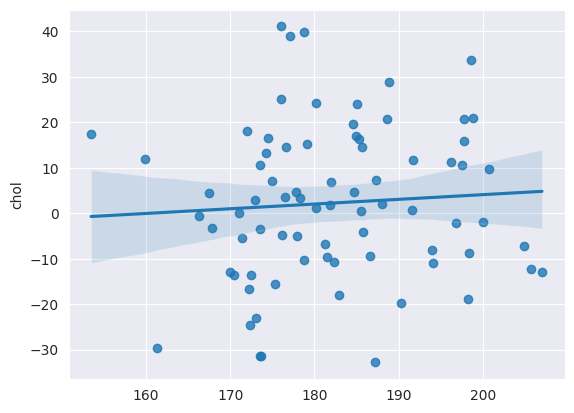

In [ ]:
sns.regplot(x=y_pred, y=y_pred - y_test)
None

I observe a meaningless scatterplot. It's really hard here to witness something logical, just a cloud of dots which doesn't seem to be possible to evaluate with linear model without significant feature engineering

[0.25] Now train the Lasso regression model. On a logarithmic scale, search for the optimal value of the regularization coefficient alpha.

In [ ]:
lasso_param_grid = {
    "alpha": np.linspace(0.01, 10, 100),
}

lasso_grid = GridSearchCV(Lasso(), param_grid=lasso_param_grid, cv=7, scoring="r2",
                          return_train_score=True, n_jobs=-1).fit(X_train, y_train)

print("Best params:", lasso_grid.best_params_)
print("Best cross validaton score", lasso_grid.best_score_)

Best params: {'alpha': 0.31272727272727274}
Best cross validaton score 0.2677816675816063


In [ ]:
grid_df = pd.DataFrame(lasso_grid.cv_results_)
grid_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.006459,0.001686,0.003011,0.000666,0.01,{'alpha': 0.01},0.019908,0.409111,0.188119,0.387166,...,10,0.375788,0.329943,0.376563,0.332792,0.363625,0.378573,0.346919,0.357743,0.019497
1,0.005553,0.001253,0.003819,0.001363,0.110909,{'alpha': 0.1109090909090909},0.034130,0.449799,0.201855,0.388176,...,6,0.371997,0.320550,0.371249,0.329693,0.358055,0.376425,0.338488,0.352351,0.020949
2,0.005843,0.001512,0.002974,0.000206,0.211818,{'alpha': 0.21181818181818182},0.051005,0.447242,0.210699,0.389989,...,3,0.368581,0.314012,0.364791,0.324439,0.351523,0.373760,0.333766,0.347267,0.021682
3,0.005956,0.002811,0.004457,0.002432,0.312727,{'alpha': 0.31272727272727274},0.069748,0.437121,0.216250,0.388877,...,1,0.364889,0.310871,0.360428,0.320022,0.345773,0.370018,0.330556,0.343222,0.021499
4,0.004573,0.000295,0.003948,0.002508,0.413636,{'alpha': 0.41363636363636364},0.081008,0.426258,0.216885,0.385893,...,2,0.360071,0.306634,0.355399,0.315553,0.339209,0.364881,0.326379,0.338304,0.021166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.007867,0.003165,0.005416,0.003338,9.596364,{'alpha': 9.596363636363636},-0.001255,-0.006037,-0.003161,-0.017237,...,50,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
96,0.005184,0.002595,0.002633,0.000186,9.697273,{'alpha': 9.697272727272727},-0.001255,-0.006037,-0.003161,-0.017237,...,50,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
97,0.005537,0.001831,0.003467,0.001224,9.798182,{'alpha': 9.798181818181817},-0.001255,-0.006037,-0.003161,-0.017237,...,50,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
98,0.008376,0.002884,0.004402,0.003274,9.899091,{'alpha': 9.899090909090908},-0.001255,-0.006037,-0.003161,-0.017237,...,50,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


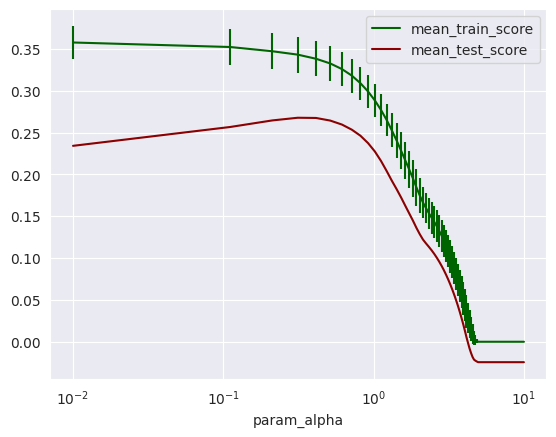

In [ ]:
ax = grid_df.plot(x='param_alpha', y='mean_train_score', yerr='std_train_score', logx=True, color='darkgreen')
grid_df.plot(x='param_alpha', y='mean_test_score', ax=ax, color='darkred')
None

WTF is this variance on a test data. Check with `yerr='std_train_score'` if u want

[0.25] For each sampled alpha for Lasso, count the number of zero weights in the model and plot its dependence on alpha. How much will we have to lose in prediction quality if we want to get rid of at least half of the features using Lasso?

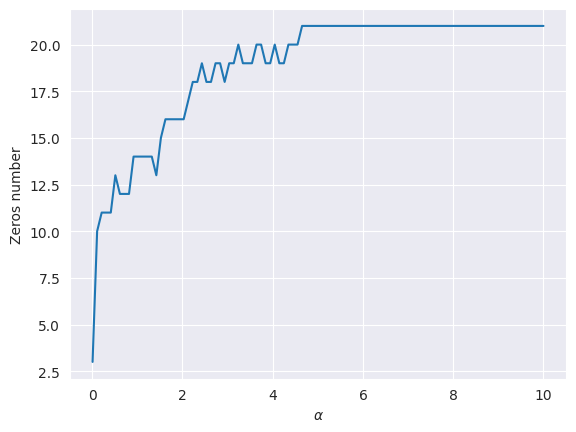

In [ ]:
# Why would you ask to rewrite BLESSED grid search to our stupid cycle to obtain number of zeros? That's gross

zeros = list()
for alpha in np.linspace(0.01, 10, 100):
  ls = Lasso(alpha=alpha).fit(X_train, y_train)
  zeros.append(np.count_nonzero(ls.coef_ == 0)) # Efficient way to count booleans

plt.plot(np.linspace(0.01, 10, 100), zeros)
plt.xlabel(r"$\alpha$")
plt.ylabel("Zeros number")
None

In [ ]:
mask = [x >= X_train.shape[1]//2 for x in zeros]

lasso_param_grid = {
    "alpha": np.linspace(0.01, 10, 100)[mask],
}

lasso_grid = GridSearchCV(Lasso(), param_grid=lasso_param_grid, cv=7, scoring="r2",
                          return_train_score=True, n_jobs=-1).fit(X_train, y_train)

print("Best params:", lasso_grid.best_params_)
print("Best cross validaton score", lasso_grid.best_score_) # Nothing changed, but that's a luck and cheating cuz I used GridSearchCV

Best params: {'alpha': 0.31272727272727274}
Best cross validaton score 0.2677816675816063


[0.5] Train and optimize hyperparameters for Elastic Net, Ridge, SVM and KNN.

In [ ]:
# Ridge
ridge_param_grid = {
    "alpha": np.linspace(0.001, 10, 100),
}

ridge_grid = GridSearchCV(ElasticNet(), param_grid=ridge_param_grid, cv=7, scoring="r2",
                          n_jobs=-1).fit(X_train, y_train)

print("Best params:", ridge_grid.best_params_)
print("Best cross validaton score", ridge_grid.best_score_)

Best params: {'alpha': 0.10200000000000001}
Best cross validaton score 0.2570769298210179


In [ ]:
# Elastic
elastic_param_grid = {
    "alpha": np.linspace(0.1, 0.5, 50),
    "l1_ratio": np.linspace(0.5, 1, 10),
}

elastic_grid = GridSearchCV(ElasticNet(fit_intercept=True), param_grid=elastic_param_grid, cv=7, scoring="r2",
                          n_jobs=-1).fit(X_train, y_train)

print("Best params:", elastic_grid.best_params_)
print("Best cross validaton score", elastic_grid.best_score_)

Best params: {'alpha': 0.35306122448979593, 'l1_ratio': 1.0}
Best cross validaton score 0.26827239780615564


In [ ]:
# SVM
svm_param_grid = {
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
    "C": np.linspace(0.5, 20, 20),
    "epsilon": np.linspace(0.001, 1, 10),
    "degree": range(1, 5)
}

svm_grid = GridSearchCV(SVR(), param_grid=svm_param_grid, cv=7, scoring="r2",
                          n_jobs=-1).fit(X_train, y_train)

print("Best params:", svm_grid.best_params_)
print("Best cross validaton score", svm_grid.best_score_)

Best params: {'C': 20.0, 'degree': 1, 'epsilon': 1.0, 'kernel': 'rbf'}
Best cross validaton score 0.2466879507813915


In [ ]:
# KNN

knn_param_grid = {
    'n_neighbors': list(range(10, 25)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cosine', 'l1', 'l2'],
}

knn_grid = GridSearchCV(KNeighborsRegressor(n_jobs=-1), param_grid=knn_param_grid,
                        cv=7, scoring="r2", n_jobs=-1).fit(X_train, y_train)

print("Best params:", knn_grid.best_params_)
print("Best cross validaton score", knn_grid.best_score_)

Best params: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}
Best cross validaton score 0.259431735148081


[0.25] Justify the parameters grid for each model. What number of cross-validation folds did you use? Why?

I used 7 folds for CV. It prolongated the training period and made a testing sample not that big. And also it didn't take much time opposite to `CV=10` and splitted data better than `CV=5`

The parameters grid was used according to the docs. What can be changed -- should be changed (or at least give it a try). After several RandomSearchCV tests, I resulted in what u see. The range wasn't cut significantly as I continued to work with models and changed data several times.

[0.85] Use test set to rank optimized models. Describe and interpret results.

In [ ]:
models_dick = {"Lasso": lasso_grid.best_estimator_,
               "Ridge": ridge_grid.best_estimator_,
               "ElasticNet": elastic_grid.best_estimator_,
               "SVR": svm_grid.best_estimator_,
               "KNN": knn_grid.best_estimator_}

for model_name, model in models_dick.items():
  print(f"{model_name} test r^2: {r2_score(y_test, model.predict(X_test))}")

Lasso test r^2: 0.2485150462925132
Ridge test r^2: 0.24316889374909356
ElasticNet test r^2: 0.24999764275617697
SVR test r^2: 0.15770365670252362
KNN test r^2: 0.28532886943237623


I'm wondering how SVR become the worst model here and KNN the best. Pure luck I guess or the data in such dimensionality is clustered. But anyway, I wouldn't use KNN here, maybe UMAP.

Looks like regularization does it's job here and some of the features are useless and they only interfere with high-quality training. Thus, Elastic, which combines $l_1$ and $l_2$ regs, comes second. Lasso with $l_1$ regularization is nearly at Elastic level, so I can have a guess that $l_2$ normalization is not that effective in this task.

[0.85] Perform a feature importance analysis for all models (where applicable), interpret the results, and make appropriate comparisons.

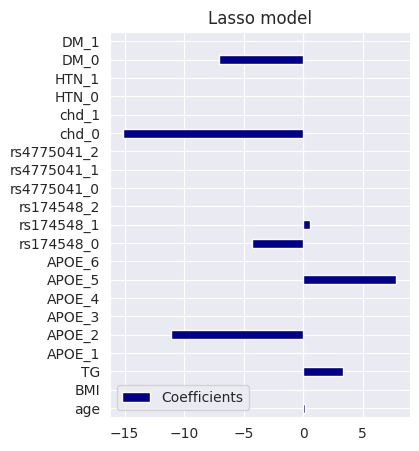

In [ ]:
coefs = pd.DataFrame(
    lasso_grid.best_estimator_.coef_, columns=["Coefficients"], index=X_train.columns
)

coefs.plot(kind="barh", figsize=(5, 5), color='darkblue')
plt.title("Lasso model")
plt.subplots_adjust(left=0.3)

Interesting to see how many features lasso throws away. 13, in my opinion, is too much for this task. Ofc I didn't do much feature engineering, but nonetheless, some of them in terms of logic should have had influence

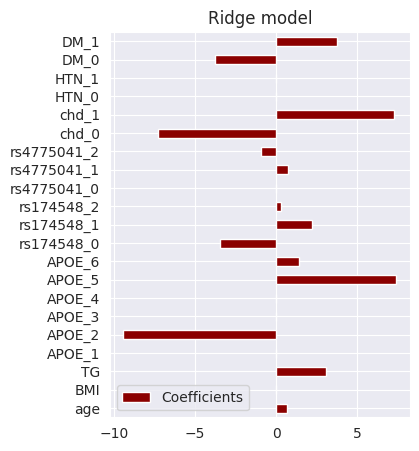

In [ ]:
coefs = pd.DataFrame(
    ridge_grid.best_estimator_.coef_, columns=["Coefficients"], index=X_train.columns
)

coefs.plot(kind="barh", figsize=(5, 5), color='darkred')
plt.title("Ridge model")
plt.subplots_adjust(left=0.3)

Much better in comparison to Lasso. At the same time, Ridge model seems to "agree" with Lasso about useless features for them

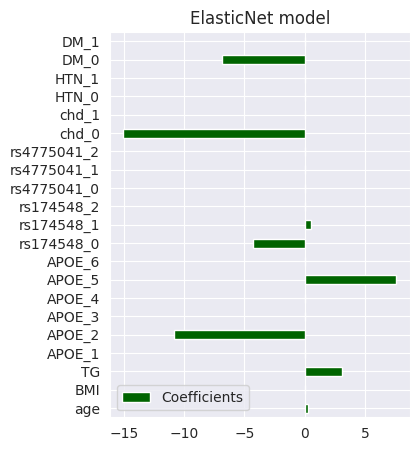

In [ ]:
coefs = pd.DataFrame(
    elastic_grid.best_estimator_.coef_, columns=["Coefficients"], index=X_train.columns
)

coefs.plot(kind="barh", figsize=(5, 5), color='darkgreen')
plt.title("ElasticNet model")
plt.subplots_adjust(left=0.3)

Beautiful: combination.

All models heavily rely on several features:
  1. `chd` -- if a patient has a coronary heart disease. It seems logical, but backwards: high holesterol level has a great impact on development of CHD.
  2. `DM` -- diabetes. The reduced ability of one's with diabetes organism needs to be controlled, as the food that they eat may increase cholesterol level.
  3. `TG` -- obviously should be cosidered, as it is used in calculation of total cholesterole level in organism.
  4. `APOE 5` -- brilliant. All models use APOE 5 genotype to understand whether to expect cholesterol level. [Studies](https://www.healthline.com/health/cholesterol/apoe4-gene-and-high-cholesterol) prove that this mutation should be considered  
  5. `APOE 2` -- yes, there is logic. APOE e2 allele is considered "normal" and doesn't have influence on cholesterol level (or might reduce it). Thus, the weight of this feature is negative.

  And also I see no logic at all when all models fucking throw away `BMI` **which should have been really useful**.

[0.85] Answer the following questions:

* Which model works the best with cholesterol data? Explain, what could be the reason for it.

ElasticNet in my case. That might be because of combination of penalties.

* Based on your analysis above, have you found expected/unexpected important features? Is the connection with cholesterol level seems logical?

Totally unexpected to see that `BMI` and all `rs4775041` don't affect model weights. Age seems logical: we do not like and do not accept ageism. Interesting to see the `APOE e2/e3` weight, as it might be correlated to (doi: 10.1016/j.stemcr.2021.11.007).
`chd` and `DM` look understandable

* Would you suggest to use that model to a doctor or use it in a real study?

**No, never**

# Extra points [2.0]

[0.5 + 1.0] Implement stochastic gradient descent for linear regression from scrath. Make it in a form of python function!

[0.5] If you make it as simple as the one-feature model we looked at in the class, [1.0] for implementation that works with whole cholesterol dataset.

In [ ]:
def SGD(X, y, lr=0.001, iterations_number=1000):

  X[["0"]] = 1 # fit intercept yo
  X = StandardScaler().fit_transform(X)

  y = y.values
  w = np.zeros(X.shape[1])
  mses = list()
  for _ in range(iterations_number):
    batch_mse = list()
    y_pred = X @ w
    inds = np.random.choice(np.arange(X.shape[0]), size=250, replace=False)

    grad = 2 * (y_pred[inds] - y[inds])[:, np.newaxis] * X[inds]
    grad = grad.mean(axis=0)

    w -= lr * grad

    mses.append(mean_squared_error(y, y_pred))

  return w, mses

In [ ]:
w, mses = SGD(X_train, y_train)
w

array([ 0.70406445,  1.46558901,  1.02801135, -1.00285484, -4.04094857,
        0.4753962 , -0.10372091,  3.6471218 ,  1.10174848, -1.66431506,
        1.50877181,  0.38565681, -0.05727092,  0.24053778, -0.33492385,
       -3.74141564,  3.74141564, -0.09151128,  0.09151128, -2.04178021,
        2.04178021,  0.        ])

In [ ]:
print(f"MSE:\t{mean_squared_error(y_train, X_train @ w)}\nR^2:\t{r2_score(y_train, X_train @ w)}")

MSE:	31690.369128091752
R^2:	-67.323673410083


[0.5] Use any implementation of SGD to calculate MSE at each step. Make a plot that represents how MSE changes with each step. What learning rate and batch size works best for you?

Hope mine works. As I understood from my tries, `lr` should be somewhere at $0.0001 \leqslant lr \leqslant 0.001$ with bigger batch size (at about 300) or $0.15 \leqslant lr \leqslant 0.25$ with small batch size (about 50)

<Axes: >

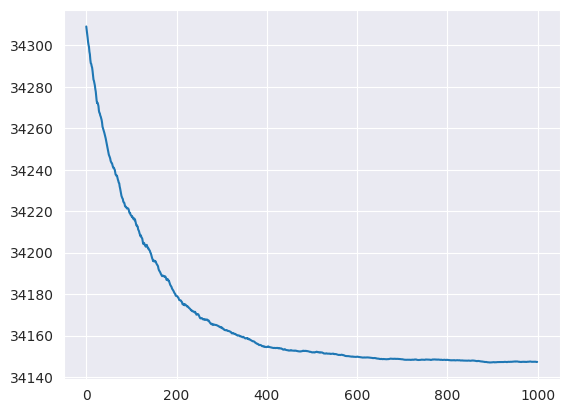

In [ ]:
sns.lineplot(mses)

Ну да, сходится. Вернее, крутится около, но всё время кажется, что минимум для функции потерь уже был перепрыгнут. Причём как бы я ни игрался с параметрами, хорошего качества для $R^2$ не выходит.

Более того: это не моя проблема, как это показано ниже.

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
try:
  X_train = X_train.drop(columns="0", axis=1)
except:
  pass

sgdr_param_grid = {
    "alpha": np.linspace(0.001, 0.5, 10),
    "penalty": ["l2", "l1", "elasticnet", None],
    "l1_ratio": np.linspace(0.001, 0.9, 10)
}

sgdr_grid = GridSearchCV(SGDRegressor(fit_intercept=True, max_iter=int(1e4)), param_grid=sgdr_param_grid,
                        cv=10, scoring="r2", n_jobs=-1).fit(X_train, y_train)

print("Best params:", sgdr_grid.best_params_)
print("Best cross validaton score", sgdr_grid.best_score_)

Best params: {'alpha': 0.33366666666666667, 'l1_ratio': 0.40055555555555555, 'penalty': None}
Best cross validaton score 0.17478896384354775


In [ ]:
# sgdr_grid.best_estimator_.predict(X_train)
r2_score(y_test, sgdr_grid.best_estimator_.predict(X_test))

-0.03733948326262504

### SGD ДЛЯ ЛОХОВ, ДЕРЕВЬЯ ДЛЯ ПАЦАНОВ

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest_param_grid = {
    "n_estimators": [300, 350, 400, 450, 500],
    "criterion": ["squared_error"],
    "max_depth": range(5, 10),
    "max_features": ["log2", "sqrt"],
}

forest_grid = GridSearchCV(RandomForestRegressor(n_jobs=-1), param_grid=forest_param_grid,
                           cv=7, scoring="r2", n_jobs=-1).fit(X_train, y_train.to_numpy().ravel())

print("Best params:", forest_grid.best_params_)
print("Best cross validaton score", forest_grid.best_score_)

Best params: {'criterion': 'squared_error', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 450}
Best cross validaton score 0.2969325222098171


In [ ]:
r2_score(y_test, forest_grid.best_estimator_.predict(X_test)) # NIIIIIIIICE

0.23616543226544107

#### СЛАВЯНСКИЙ КЭТБУСТ

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
cbt_param_grid = {
    "iterations": [200, 250, 300],
    "learning_rate":  [0.04, 0.05],
    "depth": range(1, 5),
    "l2_leaf_reg": [0.15, 0.2, 0.25],
    "bootstrap_type": ["Bayesian"]
}

cbt_grid = GridSearchCV(CatBoostRegressor(thread_count=-1, silent=True),
                  cbt_param_grid, scoring="r2", cv=7, n_jobs=-1).fit(X_train, y_train)

print("Best params:", cbt_grid.best_params_)
print("Best cross validaton score", cbt_grid.best_score_)

Best params: {'bootstrap_type': 'Bayesian', 'depth': 2, 'iterations': 250, 'l2_leaf_reg': 0.25, 'learning_rate': 0.05}
Best cross validaton score 0.3056971540602783


In [ ]:
r2_score(y_test, cbt_grid.best_estimator_.predict(X_test))

0.16815268036986708